In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Reading the nodes and edges data
nodes_df = pd.read_csv('nodes.csv')
edges_df = pd.read_csv('edges.csv')

* At the first step, let's have a look at the trend of migrations from countries over time.

In [3]:
edges_df.head()

,# source,target,migration_1990_total,migration_1990_male,migration_1990_female,migration_1995_total,migration_1995_male,migration_1995_female,migration_2000_total,migration_2000_male,migration_2000_female,migration_2005_total,migration_2005_male,migration_2005_female,migration_2010_total,migration_2010_male,migration_2010_female,migration_2015_total,migration_2015_male,migration_2015_female
0,0,64,237,194,43,188,150,38,154,117,37,183,142,41,198,152,46,235,173,62
1,0,118,677,556,121,452,351,101,236,155,81,259,187,72,284,206,78,320,231,89
2,0,142,64,26,38,61,25,36,58,23,35,45,18,27,43,18,25,39,17,22
3,0,191,59,37,22,36,24,12,30,20,10,47,27,20,69,41,28,83,50,33
4,0,202,8485,3726,4759,12248,5518,6730,17118,7874,9244,12636,5687,6949,8900,3906,4994,7587,3279,4308


* To obtain the migration from each country at each year we need to sum the values in __migration_year_total__ column for each source. 

In [4]:
edges_df.dtypes

# source                  int64
 target                   int64
 migration_1990_total     int64
 migration_1990_male      int64
 migration_1990_female    int64
 migration_1995_total     int64
 migration_1995_male      int64
 migration_1995_female    int64
 migration_2000_total     int64
 migration_2000_male      int64
 migration_2000_female    int64
 migration_2005_total     int64
 migration_2005_male      int64
 migration_2005_female    int64
 migration_2010_total     int64
 migration_2010_male      int64
 migration_2010_female    int64
 migration_2015_total     int64
 migration_2015_male      int64
 migration_2015_female    int64
dtype: object

In [5]:
nodes_df.columns

Index(['# index', ' name', ' code', ' region', ' sub_region', ' _pos'], dtype='object')

In [6]:
# mapping the name of the source and target nodes to the edges dataframe
edges_df['source_country'] = edges_df['# source'].map(nodes_df.set_index('# index')[' name'])
edges_df['target_country'] = edges_df[' target'].map(nodes_df.set_index('# index')[' name'])

In [7]:
edges_df.columns

Index(['# source', ' target', ' migration_1990_total', ' migration_1990_male',
       ' migration_1990_female', ' migration_1995_total',
       ' migration_1995_male', ' migration_1995_female',
       ' migration_2000_total', ' migration_2000_male',
       ' migration_2000_female', ' migration_2005_total',
       ' migration_2005_male', ' migration_2005_female',
       ' migration_2010_total', ' migration_2010_male',
       ' migration_2010_female', ' migration_2015_total',
       ' migration_2015_male', ' migration_2015_female', 'source_country',
       'target_country'],
      dtype='object')

In [8]:
# Creating a directed graph
G_1990_total = nx.from_pandas_edgelist(edges_df, 'source_country', 'target_country', 
                            edge_attr=' migration_1990_total', create_using=nx.DiGraph())

# Creating a directed graph
G_1995_total = nx.from_pandas_edgelist(edges_df, 'source_country', 'target_country', 
                            edge_attr=' migration_1995_total', create_using=nx.DiGraph())

# Creating a directed graph
G_2000_total = nx.from_pandas_edgelist(edges_df, 'source_country', 'target_country', 
                            edge_attr=' migration_2000_total', create_using=nx.DiGraph())

# Creating a directed graph
G_2005_total = nx.from_pandas_edgelist(edges_df, 'source_country', 'target_country', 
                            edge_attr=' migration_2005_total', create_using=nx.DiGraph())

# Creating a directed graph
G_2010_total = nx.from_pandas_edgelist(edges_df, 'source_country', 'target_country', 
                            edge_attr=' migration_2010_total', create_using=nx.DiGraph())

# Creating a directed graph
G_2015_total = nx.from_pandas_edgelist(edges_df, 'source_country', 'target_country', 
                            edge_attr=' migration_2015_total', create_using=nx.DiGraph())


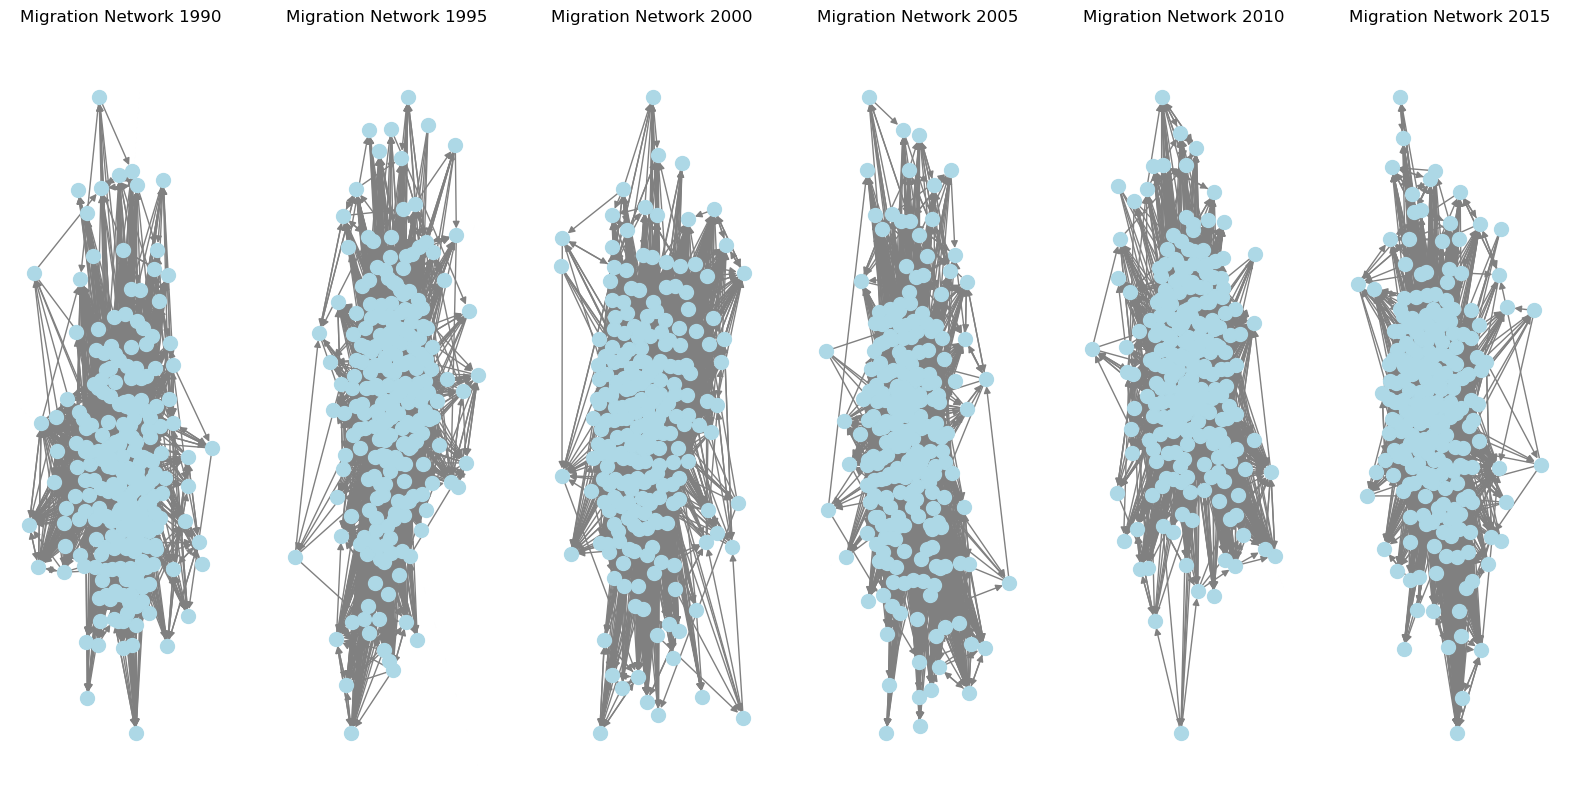

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a list of graphs
graphs = [G_1990_total, G_1995_total, G_2000_total, G_2005_total, G_2010_total, G_2015_total]

# Creating a list of years
years = [1990, 1995, 2000, 2005, 2010, 2015]

# Creating a figure with subplots
fig, axs = plt.subplots(1, 6, figsize=(20, 10))

# Looping through the graphs and years
for i, (graph, year) in enumerate(zip(graphs, years)):
    # Setting the title of the subplot
    axs[i].set_title(f'Migration Network {year}')
    
    # Computing the positions of the nodes using the spring layout algorithm
    pos = nx.spring_layout(graph)
    
    # Drawing the graph on the subplot
    nx.draw(graph, pos=pos, ax=axs[i], with_labels=False, node_color='lightblue', edge_color='gray', font_size=10, node_size=100)
    
# Displaying the figure
plt.show()


In [ ]:
# Computing the centrality measures of each graph
deg_centrality = [nx.degree_centrality(graph) for graph in graphs]
btw_centrality = [nx.betweenness_centrality(graph) for graph in graphs]
cls_centrality = [nx.closeness_centrality(graph) for graph in graphs]
egv_centrality = [nx.eigenvector_centrality(graph) for graph in graphs]
#katz_centrality = [nx.katz_centrality(graph) for graph in graphs]

In [ ]:
deg_centrality[0].keys()

232

In [ ]:
# Creating a dataframe with the centrality measures of each graph
deg_centrality_df = pd.DataFrame(deg_centrality)
btw_centrality_df = pd.DataFrame(btw_centrality)
cls_centrality_df = pd.DataFrame(cls_centrality)
egv_centrality_df = pd.DataFrame(egv_centrality)

"""centrality_df = pd.concat([deg_centrality_df, btw_centrality_df, cls_centrality_df, egv_centrality_df], axis=1)
centrality_df['year'] = years

deg_centrality_df"""

,Afghanistan,Egypt,Libya,Namibia,South Africa,Tajikistan,Malaysia,Philippines,Thailand,India,...,Djibouti,Yemen,Somalia,Tuvalu,Monaco,Wallis and Futuna Islands,Gambia,Gibraltar,Holy See,Saint Helena
0,0.290043,0.926407,0.627706,0.506494,0.995671,0.337662,0.398268,0.822511,0.545455,0.709957,...,0.116883,0.25974,0.264069,0.099567,0.138528,0.051948,0.194805,0.082251,0.021645,0.056277
1,0.290043,0.926407,0.627706,0.506494,0.995671,0.337662,0.398268,0.822511,0.545455,0.709957,...,0.116883,0.25974,0.264069,0.099567,0.138528,0.051948,0.194805,0.082251,0.021645,0.056277
2,0.290043,0.926407,0.627706,0.506494,0.995671,0.337662,0.398268,0.822511,0.545455,0.709957,...,0.116883,0.25974,0.264069,0.099567,0.138528,0.051948,0.194805,0.082251,0.021645,0.056277
3,0.290043,0.926407,0.627706,0.506494,0.995671,0.337662,0.398268,0.822511,0.545455,0.709957,...,0.116883,0.25974,0.264069,0.099567,0.138528,0.051948,0.194805,0.082251,0.021645,0.056277
4,0.290043,0.926407,0.627706,0.506494,0.995671,0.337662,0.398268,0.822511,0.545455,0.709957,...,0.116883,0.25974,0.264069,0.099567,0.138528,0.051948,0.194805,0.082251,0.021645,0.056277
5,0.290043,0.926407,0.627706,0.506494,0.995671,0.337662,0.398268,0.822511,0.545455,0.709957,...,0.116883,0.25974,0.264069,0.099567,0.138528,0.051948,0.194805,0.082251,0.021645,0.056277


In [ ]:
# Selecting top 5 countries with the highest out- degree centrality in 1990
deg_centrality_df[1990].sort_values(ascending=False).head()


United Kingdom of Great Britain and Northern Ireland    1.510823
Canada                                                  1.497835
France                                                  1.484848
Australia                                               1.380952
United States of America                                1.346320
Name: 0, dtype: float64

{'Afghanistan': 0.27705627705627706,
 'Egypt': 0.354978354978355,
 'Libya': 0.2554112554112554,
 'Namibia': 0.1471861471861472,
 'South Africa': 0.35064935064935066,
 'Tajikistan': 0.18614718614718614,
 'Malaysia': 0.30303030303030304,
 'Philippines': 0.4329004329004329,
 'Thailand': 0.3333333333333333,
 'India': 0.5541125541125541,
 'Iran (Islamic Republic of)': 0.3246753246753247,
 'Pakistan': 0.4329004329004329,
 'Sri Lanka': 0.30735930735930733,
 'Azerbaijan': 0.20346320346320346,
 'Bahrain': 0.18614718614718614,
 'Cyprus': 0.19047619047619047,
 'Iraq': 0.2987012987012987,
 'Israel': 0.2943722943722944,
 'Jordan': 0.29004329004329005,
 'Kuwait': 0.22077922077922077,
 'Qatar': 0.1645021645021645,
 'Saudi Arabia': 0.2813852813852814,
 'Syrian Arab Republic': 0.341991341991342,
 'Turkey': 0.3593073593073593,
 'United Arab Emirates': 0.21212121212121213,
 'Belarus': 0.23809523809523808,
 'Bulgaria': 0.2857142857142857,
 'Czech Republic': 0.2554112554112554,
 'Hungary': 0.27272727272727

In [1]:
# computing the betweenness centrality of each graph
btw_centrality = [nx.betweenness_centrality(graph) for graph in graphs]
btw_centrality_df = pd.DataFrame(btw_centrality)

NameError: name 'graphs' is not defined